# Activitat 1 / Activity 1

Apliqueu els algorismes jerarquic i DBScan al conjunt de dades de borsa i avalueu-los.

1. Apliqueu els diferents algorismes jerarquics que coneixeu sobre el conjunt de dades i avalueu els resultats
2. Apliqueu els algorismes jerarquics sobre els centres de K-means amb k elevada (p.e. k=20) i avalueu-los
3. Mireu quins serien bons parametres per DBScan, apliqueu al conjunt de dades i avalueu resultats
4. Compareu els resultats de tots els mètodes i digueu quin mètode dona millors resultats i si creieu que hi ha algun motiu per això 

----------------------------

Apply the hierarchical algorithms and DBScan algorithm to the stocks data set and evaluate them.

1. Apply the different hierarchical algorithms you know about the dataset and evaluate the results
2. Apply the hierarchical algorithms on K-means centers with elevated k (p.e. k = 20) and evaluate them
3. Find good  parameters for DBScan, apply them to the data set and evaluate results
4. Compare the results of all the methods and show which method gives better results and if you think there is any reason for this


## Read and Normalize Dataset

In [27]:
import pandas as pd
import numpy as np

import umap.umap_ as umap

from matplotlib import cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
stocks_df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
stocks_df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [6]:
companies = list(stocks_df.index)
movements = stocks_df.values

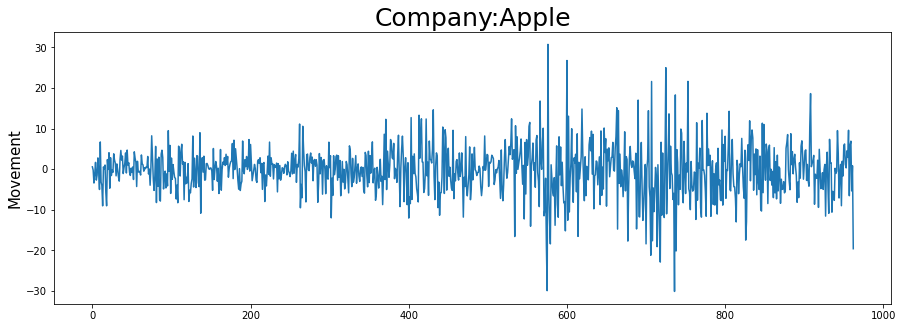

In [7]:
plt.figure(figsize = (15,5)) 
plt.title(f'Company:{companies[0]}',fontsize = 25)
plt.ylabel('Movement',fontsize = 15)
plt.plot(movements[0])

In [8]:
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

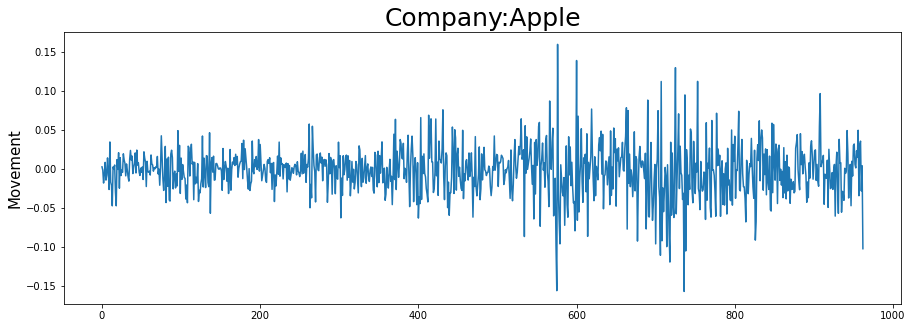

In [9]:
plt.figure(figsize = (15,5)) 
plt.title(f'Company:{companies[0]}',fontsize = 25)
plt.ylabel('Movement',fontsize = 15)
plt.plot(norm_movements[0])

## Data Reduction
### PCA

In [24]:
pca = PCA(2)
X_pca = pca.fit_transform(norm_movements)

Text(0.5, 1.0, 'PCA Reduction')

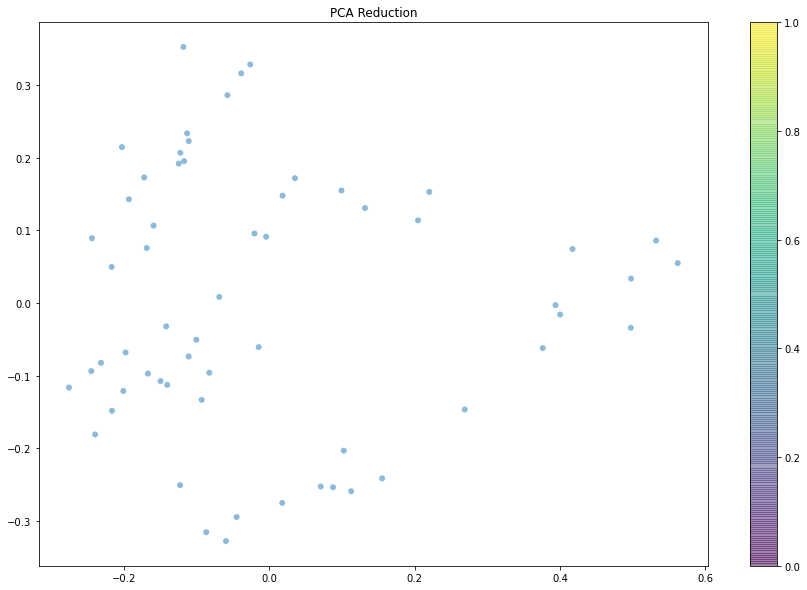

In [25]:
plt.figure(figsize=(15, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            edgecolor='none', alpha=0.5,cmap='tab10')
plt.colorbar()
plt.title("PCA Reduction")

### Umap

In [19]:
X_umap = umap.UMAP(n_neighbors=2,min_dist=0.5).fit_transform(norm_movements)

Text(0.5, 1.0, 'Umap Reduction')

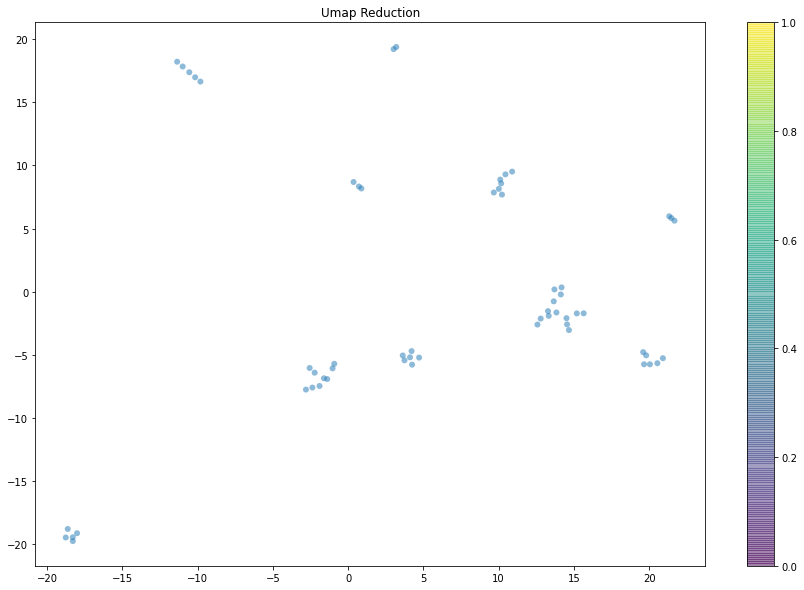

In [20]:
plt.figure(figsize=(15, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], edgecolor='none', alpha=0.5,cmap='tab10')
plt.colorbar()
plt.title("Umap Reduction")


###### 
En aquest cas he decidit redimensionar les dades degut a que sino no es poden representar vusialment i l'analisis dels resultats es més complicat.
Com podem observar el UMAP ja genera un clustes molt decisiu mentres que el PCA ho deixa més separat.

## Analisis
### Numbes of clusters

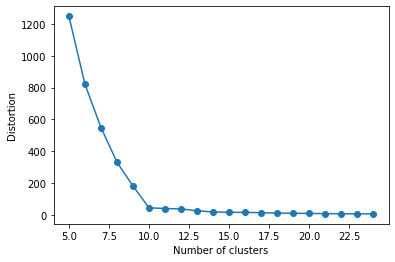

In [40]:
rang = range(5, 25)
distortions = []
for i in rang:
    km = KMeans(n_clusters=i, init='k-means++',  n_init=1, max_iter=3000, tol=1e-04, random_state=1)
    km.fit(X_umap)
    distortions.append(km.inertia_)
plt.plot(rang, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

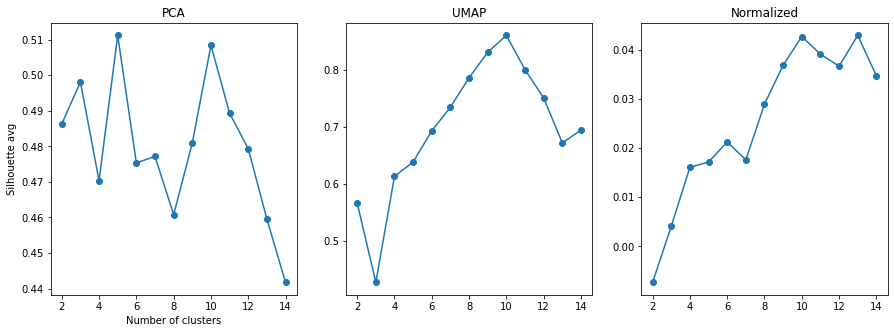

In [78]:
rang = range(2, 15)
silhouette_avg_pca = []
silhouette_avg_umap = []
silhouette_avg_norm = []

for i in rang:
    y_km_pca = KMeans(n_clusters=i, init='k-means++',  n_init=1, max_iter=3000, tol=1e-04, random_state=1).fit_predict(X_pca)
    y_km_umap = KMeans(n_clusters=i, init='k-means++',  n_init=1, max_iter=3000, tol=1e-04, random_state=1).fit_predict(X_umap)
    y_km_norm = KMeans(n_clusters=i, init='k-means++',  n_init=1, max_iter=3000, tol=1e-04, random_state=1).fit_predict(X_umap)

    silhouette_avg_pca.append(np.mean(silhouette_samples(X_pca, y_km_pca, metric='euclidean')))
    silhouette_avg_umap.append(np.mean(silhouette_samples(X_umap, y_km_umap, metric='euclidean')))
    silhouette_avg_norm.append(np.mean(silhouette_samples(norm_movements, y_km_norm, metric='euclidean')))

    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))
ax1.plot(rang, silhouette_avg_pca, marker='o')
ax2.plot(rang, silhouette_avg_umap, marker='o')
ax3.plot(rang, silhouette_avg_norm, marker='o')


ax1.set_title('PCA')
ax2.set_title('UMAP')
ax3.set_title('Normalized')

ax1.set(xlabel='Number of clusters', ylabel='Silhouette avg')


plt.show()

In [ ]:
n_clusters_pca = 5
n_clusters = 10

Com es pot observar a la gràfica, el millor nombre de clústers pel PCA estaria entre el 5 i el 10, en aquest cas escollirem el 5 per intentar millorar-ho més endavant, mentre que en el cas del UMAP és clarament el 10.

## Hierarchical Algorithms

### silhouette
####  with UMAP

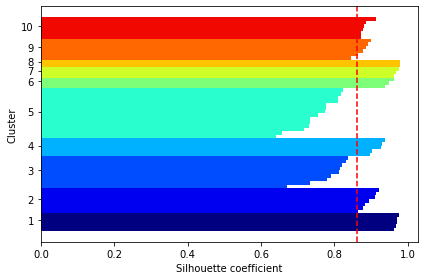

For n_clusters = 10 The average silhouette_score is : 0.8606455


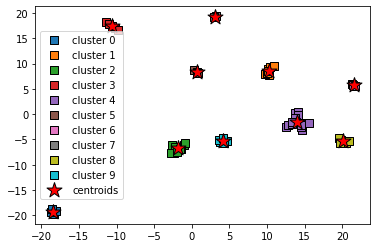

In [46]:
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_umap)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_umap, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

for i in range(n_clusters):
    plt.scatter(X_umap[y_km == i, 0], X_umap[y_km == i, 1], s=50, marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1, loc = 0)
plt.show()

#### with PCA

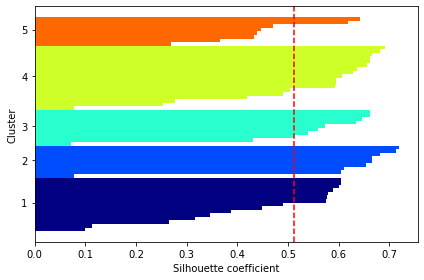

For n_clusters = 5 The average silhouette_score is : 0.5112110995440611


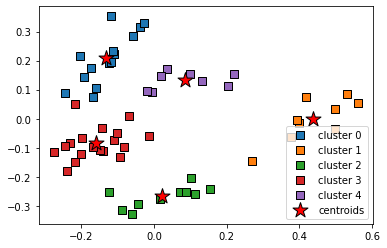

In [106]:
km = KMeans(n_clusters=n_clusters_pca, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X_pca)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

for i in range(n_clusters):
    plt.scatter(X_pca[y_km == i, 0], X_pca[y_km == i, 1], s=50, marker='s', edgecolor='black', label='cluster '+str(i))
             
plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],  s=250, marker='*',  c='red', edgecolor='black',
            label='centroids')
                
plt.legend(scatterpoints=1, loc = 0)
plt.show()

### Kmeand with Pipeline

In [94]:
kmeans_pca = KMeans(n_clusters=n_clusters_pca,init='k-means++', n_init=100, max_iter=3000, random_state=0)
kmeans_umap = KMeans(n_clusters=n_clusters,init='k-means++', n_init=100, max_iter=3000, random_state=0)

pipeline_pca = make_pipeline(kmeans_pca)
pipeline_umap = make_pipeline(kmeans_umap)

pipeline_pca.fit(X_pca)
pipeline_umap.fit(X_umap)

y_pipeline_pca = pipeline_pca.predict(X_pca)
y_pipeline_umap = pipeline_umap.predict(X_umap)

In [95]:
df_res = pd.DataFrame({'UMAP':y_pipeline_umap,'PCA':y_pipeline_pca,'companies':list(companies)}).sort_values(by=['UMAP'],axis = 0)
df_res

,UMAP,PCA,companies
57,0,2,Exxon
44,0,3,Schlumberger
53,0,3,Valero Energy
12,0,2,Chevron
10,0,2,ConocoPhillips
59,1,0,Yahoo
32,1,3,3M
23,1,4,IBM
20,1,4,Home Depot
13,1,3,DuPont de Nemours


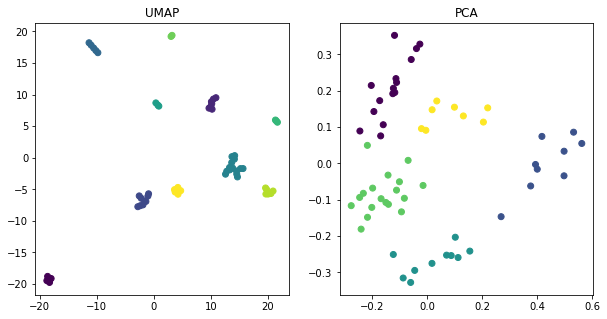

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
ax1.scatter(X_umap[:, 0],X_umap[:, 1], c= y_pipeline_umap)
ax2.scatter(X_pca[:, 0],X_pca[:, 1], c= y_pipeline_pca)

ax1.set_title('UMAP')
ax2.set_title('PCA')

plt.show()

### Linkage

In [97]:
X_umap_df = pd.DataFrame(X_umap, index=companies)
X_pca_df = pd.DataFrame(X_pca, index=companies)

row_clusters_umap = linkage(pdist(X_umap_df, metric='euclidean'), method='complete')
row_clusters_pca = linkage(pdist(X_pca_df, metric='euclidean'), method='complete')

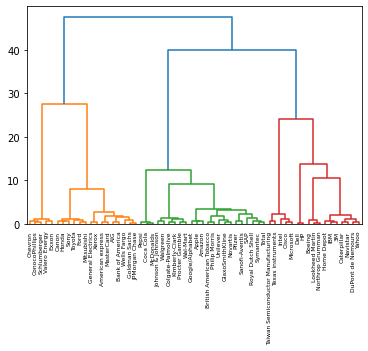

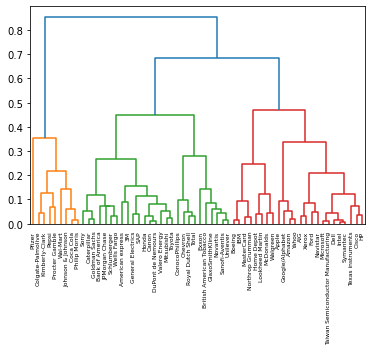

In [98]:
row_dendr = dendrogram(row_clusters_umap,labels=companies)
plt.show()
row_dendr = dendrogram(row_clusters_pca,labels=companies)

### AgglomerativeClustering

In [79]:
ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_ac_umap = ac.fit_predict(X_umap)
ac = AgglomerativeClustering(n_clusters=n_clusters_pca, affinity='euclidean', linkage='ward')
y_ac_pca = ac.fit_predict(X_pca)
ac = AgglomerativeClustering(n_clusters=13, affinity='euclidean', linkage='ward')
y_ac_normal = ac.fit_predict(norm_movements)

df_res = pd.DataFrame({'UMAP': y_ac_umap,'PCA': y_ac_pca, 'Norm': y_ac_normal, 'Companies': companies})
df_res.sort_values('UMAP')

,UMAP,PCA,Norm,Companies
0,0,0,0,Apple
39,0,3,6,Pfizer
37,0,2,11,Novartis
43,0,1,11,SAP
46,0,2,11,Sanofi-Aventis
47,0,0,4,Symantec
41,0,3,6,Philip Morris
49,0,2,11,Total
19,0,2,11,GlaxoSmithKline
17,0,0,0,Google/Alphabet


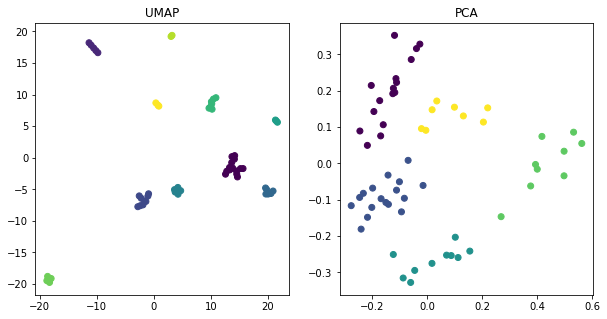

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.scatter(X_umap[:, 0],X_umap[:, 1], c= y_ac_umap)
ax2.scatter(X_pca[:, 0],X_pca[:, 1], c= y_ac_pca)

ax1.set_title('UMAP')
ax2.set_title('PCA')

plt.show()

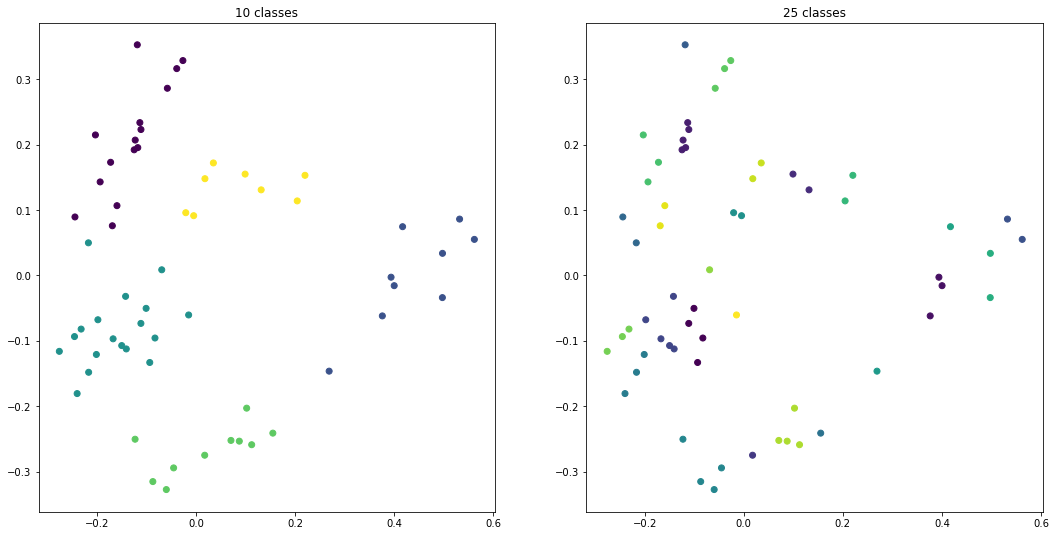

In [102]:
plt.figure(figsize=(18,9))

plt.subplot(121)
clf = KMeans(n_clusters=n_clusters_pca, random_state=1100, n_init=10)
clf.fit(X_pca)
y_pred = clf.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title("10 classes")

clfk = KMeans(n_clusters=25, random_state=100, n_init=10)
clfk.fit(X_pca)
y_predk = clfk.predict(X_pca)

plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_predk)
plt.title("25 classes")
plt.show()

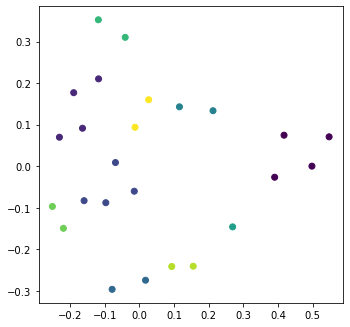

In [104]:
ac = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
labels = ac.fit_predict(clfk.cluster_centers_)

plt.figure(figsize=(12, 12))
plt.subplot(223)
plt.scatter(clfk.cluster_centers_[:, 0], clfk.cluster_centers_[:, 1], c=labels)

plt.show()

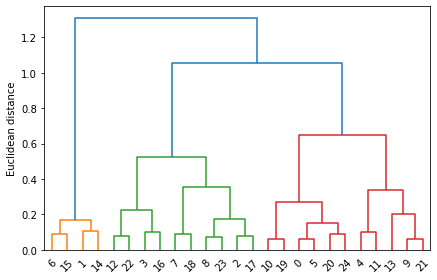

In [105]:
row_clusters = linkage(clfk.cluster_centers_, method='ward', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

He elaborat l'anàlisi a l'estructura amb tots els mètodes coneguts hi després d'analitzar els resultats es pot observar com és molt més efectiu a l'utilitzar una reducció de dimensió, però tot i això els resultats amb els valors normalitzats tampoc ens retornen uns resultats exageradament dolents, l'únic problema principal és que no es poden representar visualment degut a la gran quantitat de dimensions de les quals disposa.

## DBSCAN = Isolating regions of high density 

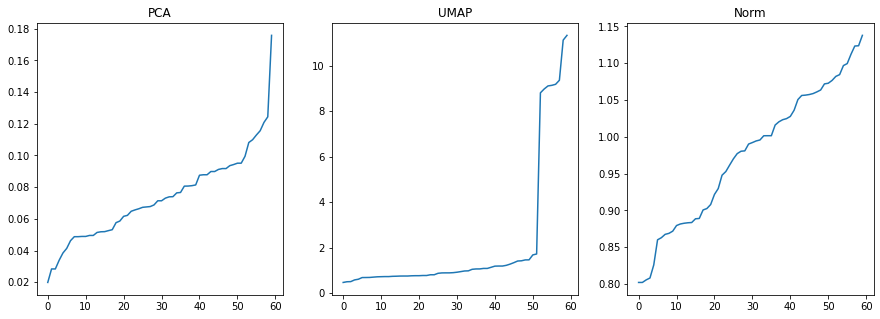

In [199]:
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import pdist, squareform

distances_pca=squareform(pdist(X_pca))
distances_umap=squareform(pdist(X_umap))
distances_norm=squareform(pdist(norm_movements))


kcloser_pca = 2
lkthc_pca = [np.sort(x)[kcloser_pca+1] for x in distances_pca]

kcloser_umap = 2
lkthc_umap = [np.sort(x)[kcloser_umap+1] for x in distances_umap]

kcloser_norm = 3
lkthc_norm = [np.sort(x)[kcloser_norm+1] for x in distances_norm]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15, 5))

ax1.plot(np.sort(lkthc_pca))
ax2.plot(np.sort(lkthc_umap))
ax3.plot(np.sort(lkthc_norm))

ax1.set_title('PCA')
ax2.set_title('UMAP')
ax3.set_title('Norm')

plt.show()

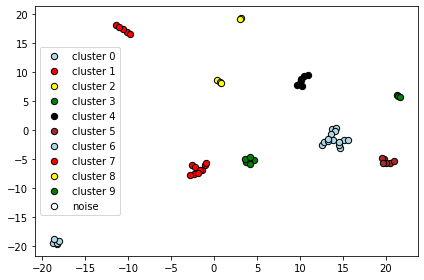

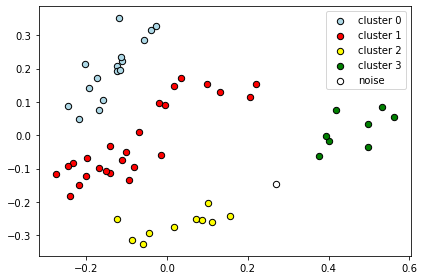

In [200]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2.5, min_samples=kcloser_umap, metric='euclidean')
y_db_umap = db.fit_predict(X_umap)

lc = ['lightblue','red','yellow','green','black','brown','blue']

for i in range(max(y_db_umap)+1):
    plt.scatter(X_umap[y_db_umap == i, 0], X_umap[y_db_umap == i, 1],
                c=lc[i%6], marker='o', s=40,
                edgecolor='black', 
                label='cluster '+str(i))
    
plt.scatter(X_umap[y_db_umap < 0, 0], X_umap[y_db_umap <0, 1],
                c='white', marker='o', s=40,
                edgecolor='black', 
                label='noise')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()



db = DBSCAN(eps=0.11, min_samples=kcloser_pca, metric='euclidean')
y_db_pca = db.fit_predict(X_pca)

lc = ['lightblue','red','yellow','green','black','brown','blue']

for i in range(max(y_db_pca)+1):
    plt.scatter(X_pca[y_db_pca == i, 0], X_pca[y_db_pca == i, 1],
                c=lc[i%6], marker='o', s=40,
                edgecolor='black', 
                label='cluster '+str(i))
    
plt.scatter(X_pca[y_db_pca < 0, 0], X_pca[y_db_pca <0, 1],
                c='white', marker='o', s=40,
                edgecolor='black', 
                label='noise')
plt.legend()
plt.tight_layout()
plt.show()

In [201]:
df_res = pd.DataFrame({'UMAP':y_db_umap,'PCA':y_db_pca,'companies':list(companies)}).sort_values(by=['UMAP'],axis = 0)
df_res

,UMAP,PCA,companies
0,0,0,Apple
19,0,2,GlaxoSmithKline
17,0,0,Google/Alphabet
37,0,2,Novartis
39,0,-1,Pfizer
41,0,3,Philip Morris
42,0,2,Royal Dutch Shell
46,0,2,Sanofi-Aventis
47,0,0,Symantec
43,0,1,SAP


Com es pot observar, en aquest cas, el BDSCAN no es un bon algoritme per intentar clasificar aquestes dades, degut a que la seva estructura no s'ajusta al necesari per un bon funcionament del BDSCAN, únicament funciona amb la reducció del UMAP perquè la condiciona.